Intro to CSV data and Pandas
----------------------------

In this notebook we'll explore working with CSV data using the Pandas Python package.

Intro to CSV data
-----------------

CSV (comma separated files) are probably the most common file format for scientific data you'll run across.
These files typical consist of a header line with field names, and then multiple lines
of data.  Both field names and data lines use a comma (',') to separate the fields.
The data line should contain more fields than the header.  If there are missing entries (e.g. two commas without intevening text), the data value is considered missing and depending on the software package used to read the file will interpert it as 0, or nil. 

Click on the file "Fremont_Bridge_Bicycle_Counter_20240410.csv" in the explorer and 
take a look around.  

Note: This file was downloaded from https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/about_data, and that should be considered the reference source.  We included it in the repository for convienence

In [6]:
# How large is the file?
# The wc (word count) utility is handy to get a sense of how large the file we are dealing with is.
# output will show: line count, word count, byte count, and filename
! wc Fremont_Bridge_Bicycle_Counter_20240410.csv

 100764  302317 3208850 Fremont_Bridge_Bicycle_Counter_20240410.csv


Pros and Cons of CSV data
-------------------------

CSV data has many advantages:

* Can easily viewed or modified with a text editor
* No special libraries are needed to work it (though as we'll see they can help)
 
There are also some downsides:
* Requires more disk space to store compared to other formats
* Relatively slow to process (text input often needs to be converted to a numeric data type)
* No standard way of defining metadata
* Not easy to use with multi-dimensional data

Intro to Pandas
---------------

Pandas is a very popular Python package working with "tabular data" (such as we find in CSV files).
Let's see how it can be used with our sample data file

In [1]:
# First we need to import pandas and matplotlib.
# The "magic": %matplotlib inline, enables plots to be rendered in the cell.
%matplotlib inline
import pandas as pd


In [2]:
# Use the pandas "read_csv" function to load the csv file.
# The function returns a pandas "dataframe" - one of the most important datatypes in pandas.
# The line "df" by itself will display the result.  
# df.head() will render the first few lines of data.
filepath = "Fremont_Bridge_Bicycle_Counter.csv"
df = pd.read_csv(filepath, header=0, parse_dates=[0], index_col=0)
df.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [3]:
# There about a 100K rows of daa
len(df)

100763

In [4]:
# The "columns" property will return the field names of the dataframe
# The first column ("Date") is considered the index, and is not returned
df.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [5]:
# The column names are a bit wordy, so let's rename them:
df.columns = ["Total", "West", "East"]
df.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [6]:
# You can retrieve any column from the dataframe using the column name
df["Total"].head()

Date
2012-10-02 13:00:00     55.0
2012-10-02 14:00:00    130.0
2012-10-02 15:00:00    152.0
2012-10-02 16:00:00    278.0
2012-10-02 17:00:00    563.0
Name: Total, dtype: float64

In [7]:
# there are a few rows with null data (perhaps the counter was offline then)
df.isnull().sum()

Total    28
West     28
East     28
dtype: int64

In [8]:
# Use fillna to replace the missing values with zero 
df = df.fillna(0)
df.isnull().sum()

Total    0
West     0
East     0
dtype: int64

In [9]:
# read_csv stored the counts as floating point but unless there are some fractional bicycle
# riders, integers should be good enough.  Use astype to convet to 4 byte integers (enough for up to 
# 2 billion riders per hour) 
df = df.astype("int32")
df.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55,7,48
2012-10-02 14:00:00,130,55,75
2012-10-02 15:00:00,152,81,71
2012-10-02 16:00:00,278,167,111
2012-10-02 17:00:00,563,393,170


In [10]:
# You can use min, max, and mean to get a sense of the range of values
df.min(), df.max(), df.mean()

(Total    0
 West     0
 East     0
 dtype: int32,
 Total    1097
 West      667
 East      850
 dtype: int32,
 Total    105.323551
 West      45.540714
 East      59.782837
 dtype: float64)

In [11]:
# if we just want stats for the total, we can select the column first
total = df["Total"]
total.min(), total.max(), total.mean()

(0, 1097, 105.32355130355388)

In [12]:
# The index (first column) are "datatime64" objects
df.index

DatetimeIndex(['2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               '2012-10-02 19:00:00', '2012-10-02 20:00:00',
               '2012-10-02 21:00:00', '2012-10-02 22:00:00',
               ...
               '2024-03-31 14:00:00', '2024-03-31 15:00:00',
               '2024-03-31 16:00:00', '2024-03-31 17:00:00',
               '2024-03-31 18:00:00', '2024-03-31 19:00:00',
               '2024-03-31 20:00:00', '2024-03-31 21:00:00',
               '2024-03-31 22:00:00', '2024-03-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=100763, freq=None)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

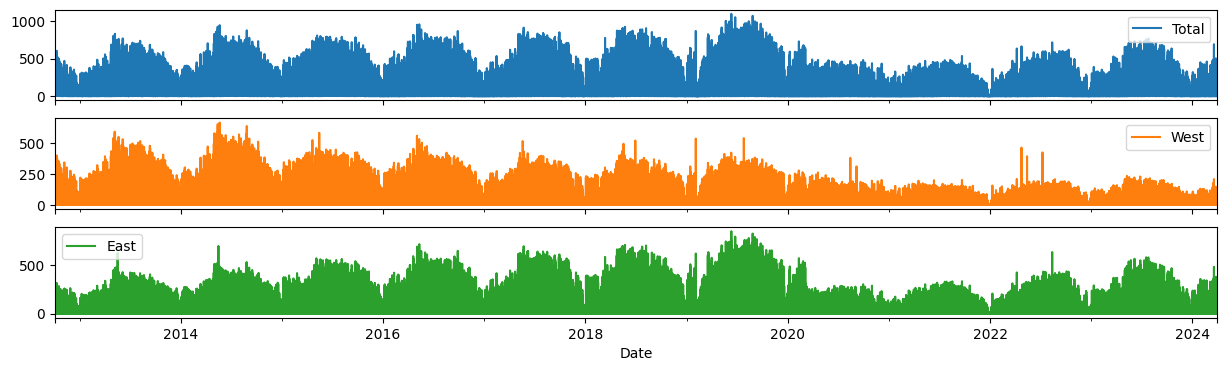

In [13]:
# The plot method will visualize the data
# Will graph the index against the 3 data columns
# Axes and legend created for us!
df.plot(subplots=True, figsize=(15,4))

In [14]:
# hourly data is a bit noisy, resample to daily
df_1day = df[["East", "West"]].resample("1d").sum()
df_1day.min(), df_1day.max(), df_1day.mean()


(East    2
 West    9
 dtype: int32,
 East    4050
 West    3008
 dtype: int32,
 East    1434.603001
 West    1092.836151
 dtype: float64)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

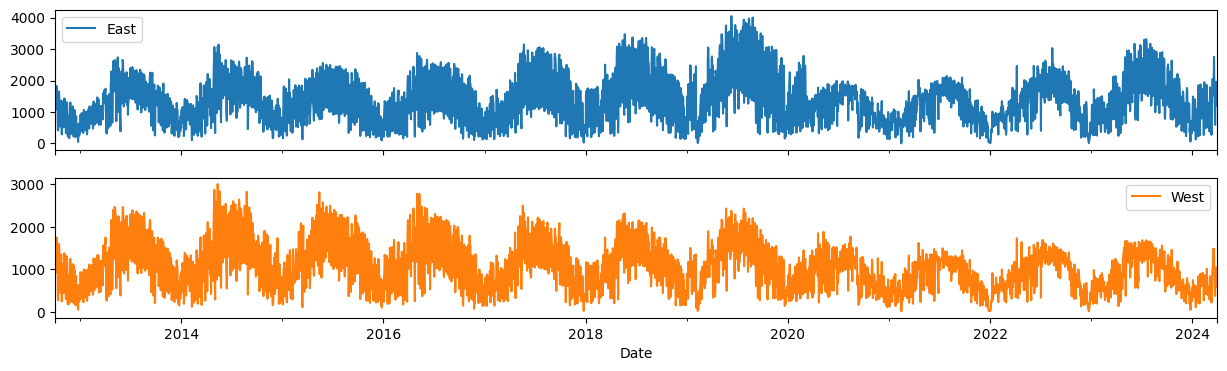

In [15]:
# plot the daily data
df_1day.plot(subplots=True, figsize=(15,4))

In [16]:
# Let's compare the east-bound, west-bound, and total sums
# The sum function will add up all the values in the column
df["East"].sum(), df["West"].sum(), df["Total"].sum()

(6023898, 4588819, 10612717)